In [16]:
import pandas
import numpy

import matplotlib.pyplot as plt

from scipy import stats
from typing import Iterable


In [19]:
df = pandas.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294342-2873/diabetes.csv")
df = df[(df["BMI"] != 0) & df["SkinThickness"] != 0]

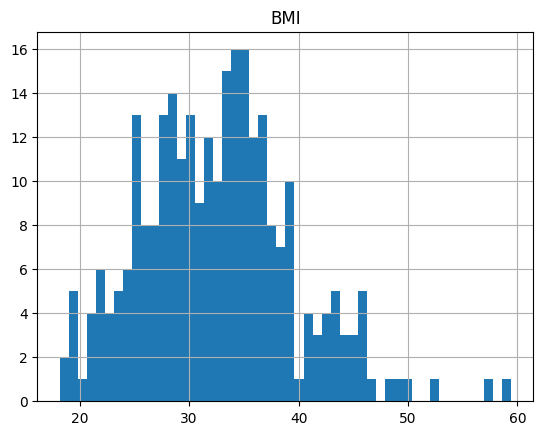

In [20]:
df.hist(column="BMI", bins=50)
plt.show()

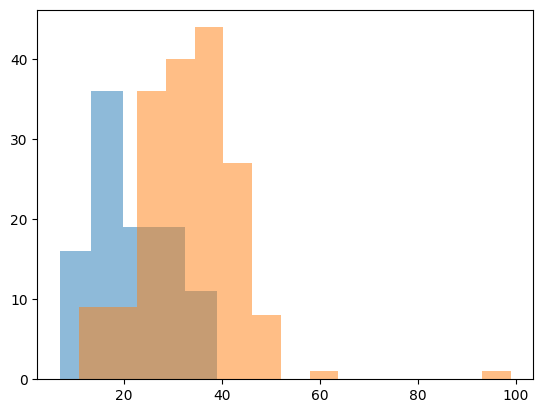

In [43]:
BMI_THRESHOLD = 30
BINS = 15

control = df[df["BMI"] < BMI_THRESHOLD]
treatment = df[df["BMI"] >= BMI_THRESHOLD]

control_range = control["SkinThickness"].max() - control["SkinThickness"].min()
treatment_range = treatment["SkinThickness"].max() - treatment["SkinThickness"].min()
max_range = max(control_range, treatment_range)
control_bins = round(control_range / max_range * BINS)
treatment_bins = round(treatment_range / max_range * BINS)

plt.hist(control["SkinThickness"], alpha=0.5, bins=control_bins)
plt.hist(treatment["SkinThickness"], alpha=0.5, bins=treatment_bins)
plt.show()

In [32]:
# H0: mean(control's SkinThickness) = mean(treatment's SkinThickness)
# H1: mean(control's SkinThickness) < mean(treatment's SkinThickness)

In [41]:
def difference_of_means_test(
    control: Iterable[float], treatment: Iterable[float], tails: int = 1
):
    n_1, n_2 = len(control), len(treatment)
    x_1, x_2 = numpy.mean(control), numpy.mean(treatment)

    # sample SD formula (aka Bessel’s correction): use n-1 in denominator
    s_1, s_2 = numpy.std(control, ddof=1), numpy.std(
        treatment, ddof=1
    )

    # conservative estimate from OpenIntro
    DOF = min(n_1, n_2) - 1

    SE = numpy.sqrt(s_1**2 / n_1 + s_2**2 / n_2)
    t_score = numpy.abs((x_2 - x_1)) / SE
    p_value = tails * stats.t.cdf(-t_score, DOF)

    # OpenIntro section 5.3.6
    pooled_SD = numpy.sqrt(
        (s_1**2 * (n_1 - 1) + s_2**2 * (n_2 - 1)) / (n_1 + n_2 - 2)
    )
    cohen_d = (x_2 - x_1) / pooled_SD

    return p_value, cohen_d


In [42]:
p_value, cohen_d = difference_of_means_test(
    control["SkinThickness"], treatment["SkinThickness"]
)
print(f"p-value: {p_value}, Cohen's d: {cohen_d}")


p-value: 4.528017967991327e-19, Cohen's d: 1.2500796162147971
